<H1>DRAW SWARM ANALYSIS</H1>

In [14]:
import pandas as pd
import numpy as np
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 24
#Font sizes modifiers for inclusion in papers. 
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


<h2>LOAD DATA</h2>

In [4]:
with open('./data/json/base.json') as json_file:
    data = json.load(json_file)
jsonr = data['params']['rb']
jsonkr = data['params']['kr']
jsonkc = data['params']['kc']
jsonkg = data['params']['kg']
jsonrgf = data['params']['rgf']
jsoncb = data['params']['cb']
jsonkd = data['params']['kd']
jsonspeed = data['params']['speed']
S=pd.read_csv('./data/csv/exp.p.csv')
C=pd.read_csv('./data/csv/exp.c.csv')
R=pd.read_csv('./data/csv/exp.r.csv')

<h2>EXTRACT STEP</h2>
Set <code>step</code> for position in simulation<br>
Set <code>id</code> for individual agent of interest.

In [11]:
step=100
id=1
#############
# SWARM DATA
#############
AGENTS=S[["STEP","ID","X","Y","PERIM"]].query("STEP==%d" % step)
PAGENTS=AGENTS.query("PERIM == True")
NAGENTS=AGENTS.query("PERIM == False")
COHESION=C[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM"]].query("STEP==%d" % step)
COHESIONP=COHESION[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM"]].query("PPERIM==True and NPERIM==True")
REPULSION=R[["STEP","PID","PX","PY","NID","NX","NY",]].query("STEP==%d" % step)
#############
# INDIVIDUAL AGENT DATA
#############
AGENT=AGENTS.query("ID==%d" % id)
ACOHESION=COHESION.query("PID==%d" % id)
ACOHESIONP=ACOHESION.query("PPERIM==True and NPERIM==True")
AREPULSION=REPULSION.query("PID==%d" % id)
# NEIGHBOURS LINK DATA
NEIGHBOURS=ACOHESION["NID"]
# NEIGHBOUR LINKS FOR STEP EXCLUDING THE TARGET AGENT 
STEPCOH=COHESION.query("STEP==%d and PID!=%d and NID!=%d" % (step,id,id))
# FILTER NEIGHBOUR STARTING POINTS USING A LIST
STARTCOH=STEPCOH[STEPCOH['PID'].isin(NEIGHBOURS)]
# FILTER NEIGHBOUR END POINTS USING A LIST
NEIGHBOURCOH=STARTCOH[STARTCOH['NID'].isin(NEIGHBOURS)]

<h2>SWARM GRAPH</h2><br>
FULL SWARM GRAPH

In [13]:
%matplotlib qt
plt.scatter(NAGENTS["X"],NAGENTS["Y"],s=30,color="black",zorder=2)
plt.scatter(PAGENTS["X"],PAGENTS["Y"],s=30,color="red",zorder=2)
for i,row in COHESION.iterrows():
    plt.annotate("%5d"%row["PID"],(row["PX"],row["PY"]), fontsize=BIGGER_SIZE)
for i,row in COHESION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="grey",zorder=1)
for i,row in COHESIONP.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="brown",zorder=1)
plt.title('rb=%s kr=%s kc=%s cb=%s\nspeed=%s kg=%s gap=%s\nSwarm at STEP:[%s]'%(jsonr,jsonkr,jsonkc,jsoncb,jsonspeed,jsonkg,jsonrgf,step))
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

REPULSION GRAPH

In [9]:
%matplotlib qt
for i,row in REPULSION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],"r-")
plt.scatter(AGENTS["X"],AGENTS["Y"],s=100)
plt.title("Swarm Repulsion at STEP:[%d]" % step)
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()

NameError: name 'REPULSION' is not defined

<H3>INDIVIDUAL AGENT GRAPHS</H3><br>
AGENT AND NEIGHBOURS

In [ ]:
%matplotlib qt
plt.scatter(AGENT["X"],AGENT["Y"],s=100,color="green")
plt.scatter(ACOHESION["NX"],ACOHESION["NY"],s=100,color="green")
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["PID"],(row["PX"],row["PY"]))
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["NID"],(row["NX"],row["NY"]))
for i,row in ACOHESION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="lightgreen")
for i,row in ACOHESIONP.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="darkgreen")

plt.title("Single Agent [%d] Swarm Cohesion at STEP:[%d]" % (id,step))
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

AGENT AND NEIGHBOURS WITH NEIGHBOUR LINKS SHOWN

In [ ]:
%matplotlib qt
plt.scatter(AGENT["X"],AGENT["Y"],s=100,color="green")
plt.scatter(ACOHESION["NX"],ACOHESION["NY"],s=100,color="green")
for i,row in NEIGHBOURCOH.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="black")
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["PID"],(row["PX"],row["PY"]))
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["NID"],(row["NX"],row["NY"]))
for i,row in ACOHESION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="lightgreen")
for i,row in ACOHESIONP.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="darkgreen")

plt.title("Single Agent [%d] Swarm Cohesion at STEP:[%d]" % (id,step))
plt.suptitle("Showing neighbour links")
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

<H3>FULL SWARM GRAPHS</H3>

<H3>MAGNITUDE ANALYSIS</H3>

In [5]:
#METRIC CALCULATIONS
mean = S[["STEP","IMAG"]].groupby('STEP').mean(0).reset_index()
std = S[["STEP","IMAG"]].groupby('STEP').std(0).reset_index()


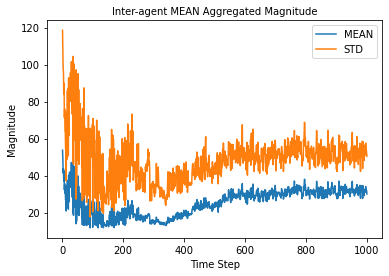

In [6]:
%matplotlib qt
plt.plot(mean.STEP,mean.IMAG,label=("MEAN"))
plt.plot(std.STEP,std.IMAG,label=("STD"))
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

In [15]:
%matplotlib qt
plt.errorbar(mean.STEP,mean.IMAG,std.IMAG,label='Cohesion magnitude',ecolor='red',color='black')
plt.tight_layout()
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

<H3>DISTANCE ANALYSIS</H3>

<H3>SWARM ANIMATION</H3>

In [ ]:
%matplotlib qt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

loop = S.STEP.max()
# GET GRAPH DISPLAY LIMITS SO IT FITS NICELY
xLimMin = S.X.min() 
xLimMax = S.X.max()
yLimMin = S.Y.min()
yLimMax = S.Y.max()

fig = plt.figure()
plt.xlim(xLimMin,xLimMax)
plt.ylim(yLimMin,yLimMax)
plt.grid()
plt.gca().set_aspect("equal")
PLOT=S[["STEP","ID","X","Y"]].query("STEP==%d" % 1)
COHESION=C[["STEP","PX","PY","NX","NY",]].query("STEP==%d" % 1)
COHESIONP=C[["STEP","PX","PY","NX","NY","PPERIM","NPERIM"]].query("PPERIM==True and NPERIM==True and STEP==%d" % 1)
scat = plt.scatter(PLOT["X"],PLOT["Y"],s=10,color="green")
plt.title('[rb=%s cb=%s kr=%s kc=%s kd=%s ko=%s ob=%s speed=%s]\n[pr=%s pc=%s pkr=%s kg=%s]\nTime (s): 1'%(jsonrb,jsoncb,jsonkr,jsonkc,jsonkd,jsonko,jsonob,jsonspeed,jsonpr,jsonpc,jsonpkr,jsonkg))

def animate(i):
    PLOT=S[["STEP","ID","X","Y"]].query("STEP==%d" % i)
    scat.set_offsets(np.c_[PLOT["X"],PLOT["Y"]])
    plt.title('[rb=%s cb=%s kr=%s kc=%s kd=%s ko=%s ob=%s speed=%s]\n[pr=%s pc=%s pkr=%s kg=%s]\nTime (s): %d or %d' % (jsonrb,jsoncb,jsonkr,jsonkc,jsonkd,jsonko,jsonob,jsonspeed,jsonpr,jsonpc,jsonpkr,jsonkg,i+1,loop))

anim = FuncAnimation(fig, animate, interval=10, frames=loop, repeat=True)
plt.draw() 

